# TP n° 3 : Synthèses de Filtres Numériques

## Importation des librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.io.wavfile
import scipy.signal as sig

plt.rcParams['figure.figsize']=(20,10)

## Question a

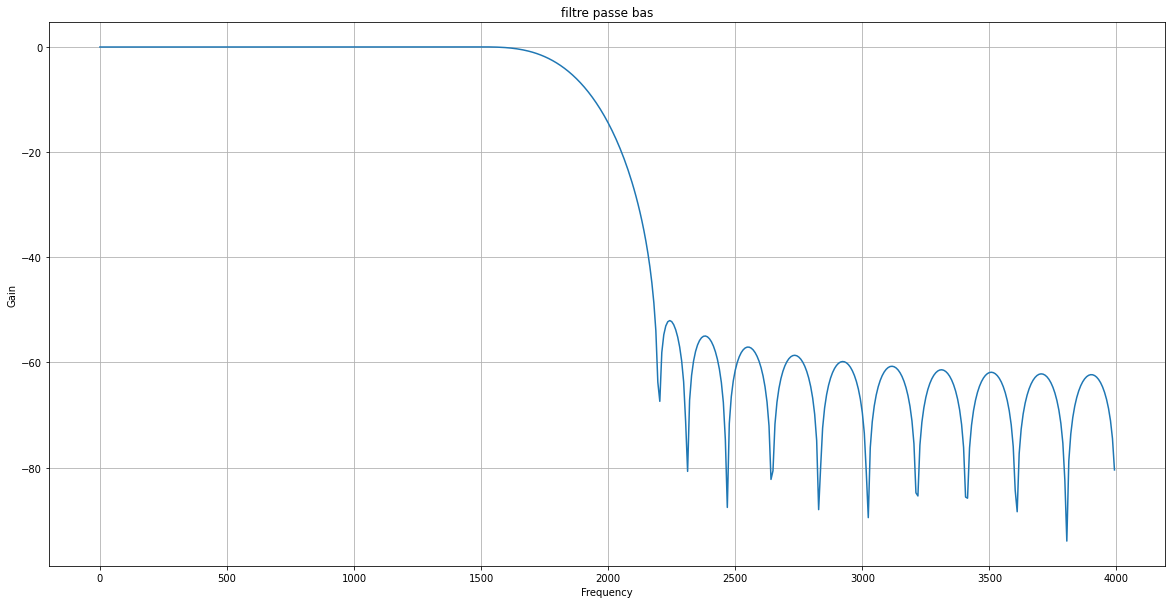

In [2]:
def lowcut_RIF(fc,lzt,oba,fe):
    num,beta=sig.kaiserord(oba,2*lzt/fe)
    sign=sig.firwin(num,fc/(fe/2),window=('kaiser',beta))
    w,h=sig.freqz(sign)
    plt.grid()
    plt.title("filtre passe bas")
    plt.plot(w*fe/(2*np.pi),20*np.log10(abs(h)))
    plt.xlabel("Frequency")
    plt.ylabel("Gain")
    plt.show()
lowcut_RIF(1875,625,51,8000)

Due au dualite frequence-temps on a choisi de travailler avec la fenetre de \textbf{ kaiser} pour assurer que le courbe de frequence n'est pas fini d'ou le courbe de temps est fini
heisenberg

## Question b

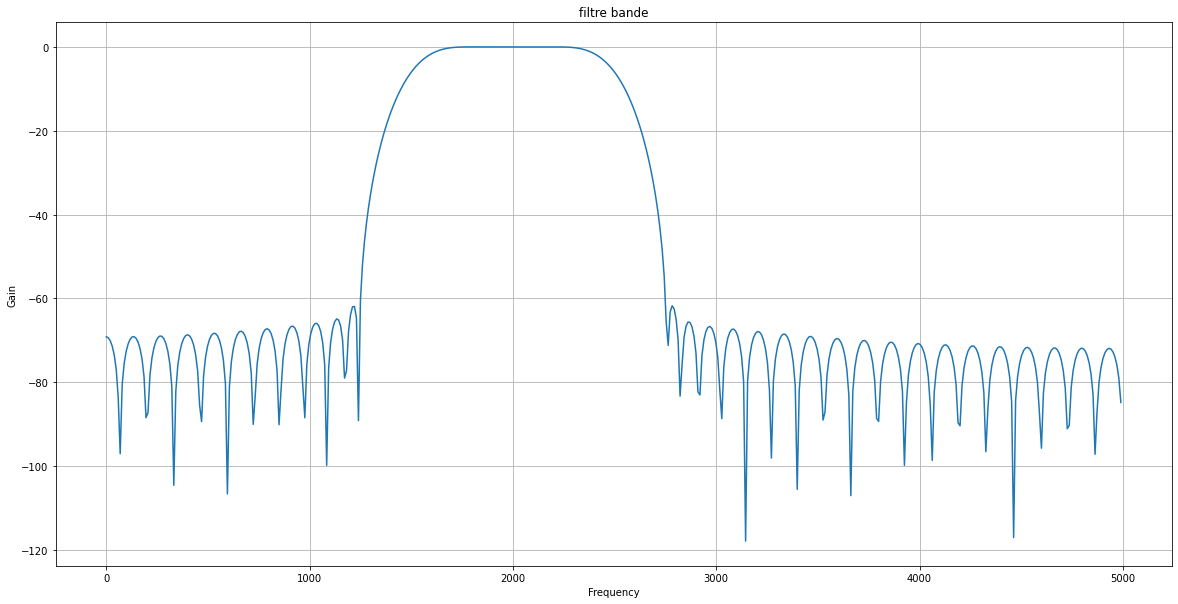

In [17]:
def bd_RIF(bd,lzt,obp,oba,fe):
    fc1,fc2=bd
    num,beta=sig.kaiserord(oba,2*lzt/fe)
    sign=sig.firwin(num,[2*fc1/fe,2*fc2/fe],window=('kaiser',beta),pass_zero='bandpass')
    w,h=sig.freqz(sign)
    plt.grid()
    plt.title("filtre bande")
    plt.plot(w*fe/(2*np.pi),20*np.log10(abs(h)))
    plt.xlabel("Frequency")
    plt.ylabel("Gain")
    plt.show()
bd_RIF((1500,2500),500,0.1,60,10000)

## Filtrage FIR d’un signal synthétique
 

### Génération de 6 sinusoïde

In [4]:
f= lambda x : np.sin(2*np.pi*1500*x)+np.sin(2*np.pi*2300*x)+np.sin(2*np.pi*2100*x)+np.sin(2*np.pi*2200*x)+np.sin(2*np.pi*3000*x)+np.sin(2*np.pi*5000*x)
signal=f(np.arange(0,0.1,1/16000))
wind=sig.firwin(50,4500/(16000/2),window='hann')
data=scipy.signal.lfilter(wind,1,signal)

### Affichage

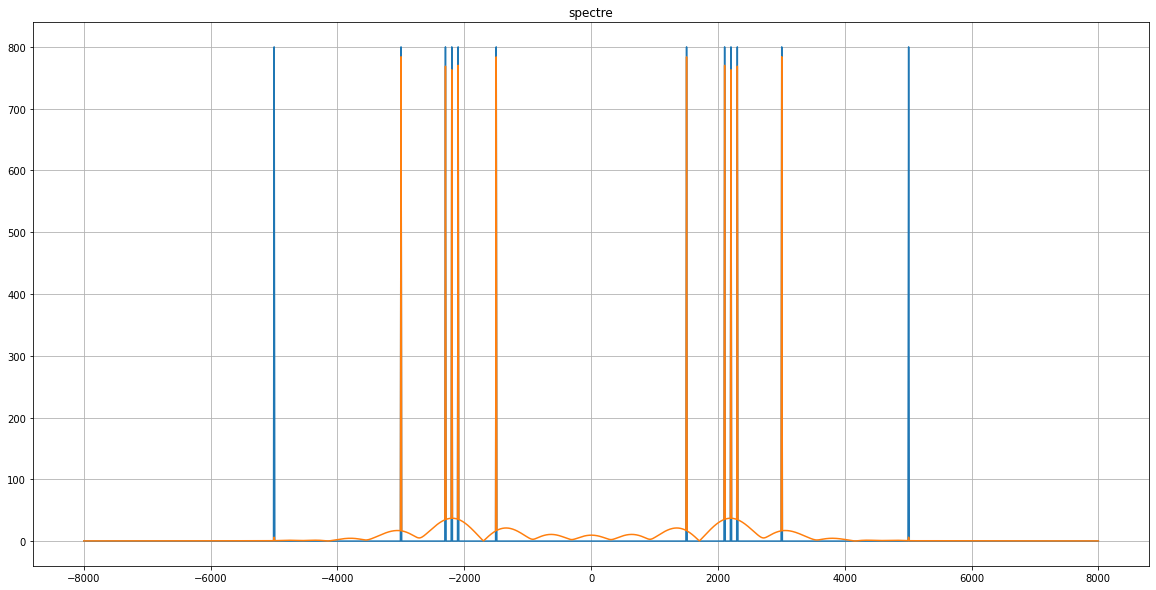

In [5]:
xf=abs(sc.fft.fftshift(sc.fft.fft(signal,n=None)))
dataf=abs(sc.fft.fftshift(sc.fft.fft(data,n=None)))
freq=np.linspace(-8000,8000,len(xf))
plt.plot(freq,xf,freq,dataf)
plt.grid()
plt.title("spectre")
plt.show()


## Rehaussement d’un signal audio


### Lecture du fichier audio

In [6]:
import sounddevice as sd
import soundfile as sf
filename = 'Mo11.wav'
data, fs = sf.read(filename, dtype='float32') 

### Calcul de la transformée de Fourrier

In [7]:
ordre=None
fe = 16000
y=abs(sc.fft.fftshift(sc.fft.fft(data,n=ordre)))

### Affichage du signal

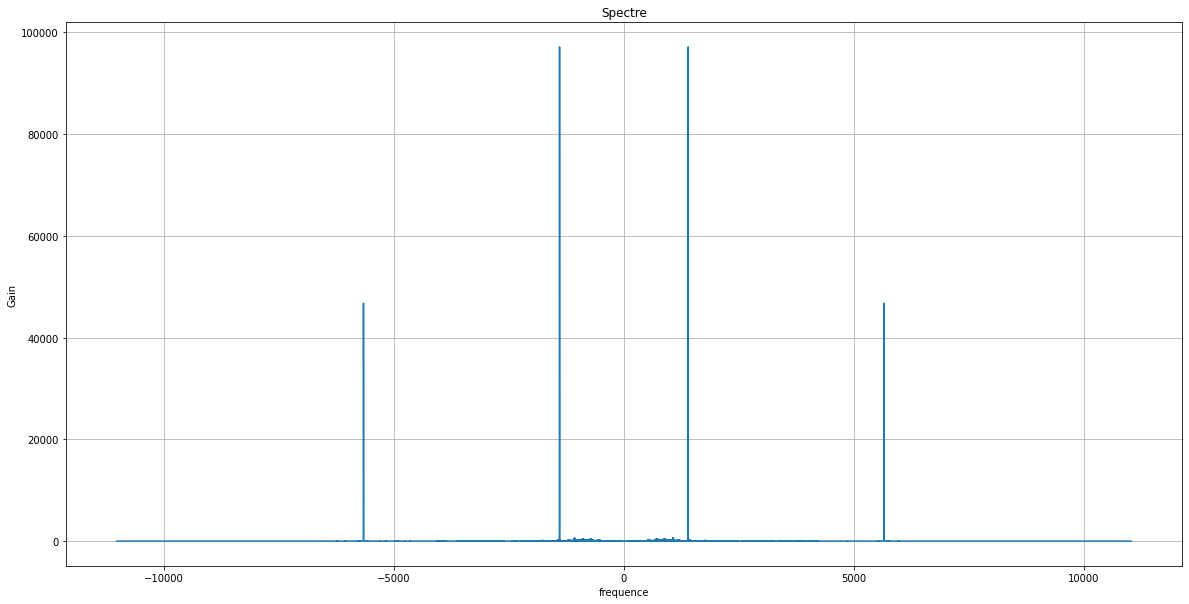

In [18]:
plt.grid()
plt.xlabel('frequence')
plt.ylabel('Gain')
plt.title('Spectre')
plt.plot(np.linspace(-fs/2,fs/2,len(y)),y)
plt.show()

In [9]:
def fir1 (fs,fc):
    sample_rate = fs
    nsamples = 100
    nyq_rate = sample_rate / 2.0
    width = 625.0/nyq_rate
    ripple_db = 51.0
    N, beta = sc.signal.kaiserord(ripple_db, width)
    cutoff_hz = fc
    taps = sc.signal.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
    w, h = sc.signal.freqz(taps)
    return w, h, taps

In [19]:
fc=800
h1,w1,taps1=fir1 (fs,fc)
filtered_x2 = sc.signal.lfilter(taps1, 1.0, data)
y2=abs(sc.fft.fftshift(sc.fft.fft(filtered_x2,n=None)))
spectre2 = np.absolute(y2)
freq=np.linspace(-fe/2,fe/2,y2.shape[0])


### Affichage du signal

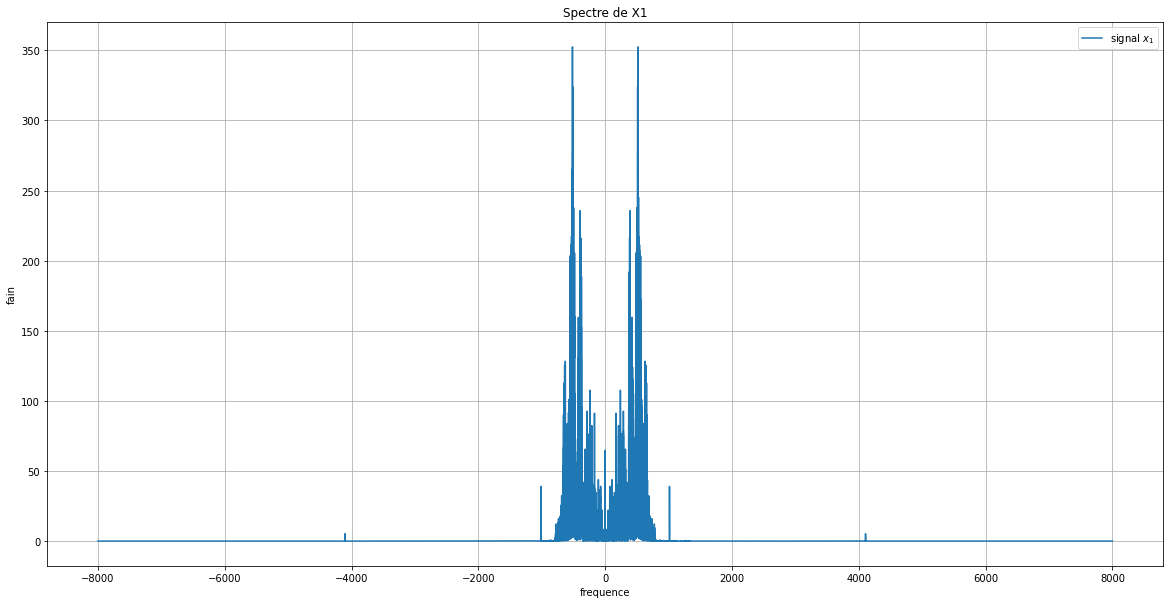

In [14]:
plt.grid()
plt.xlabel('frequence')
plt.ylabel('fain')
plt.title("Spectre de X1")
plt.plot(freq,spectre2 ,label="signal $x_1$")
plt.legend()
plt.show()

### Ecout du signal pour vérifier

In [15]:
sd.play(filtered_x2, fs)
status = sd.wait()